# 2022W-T2 AISC2003 - Advanced Analytics 01 (M07 Group 1)
# Application Exercise 4
# Task : Execute the DBSCAN Algorithm in the dataset provided within code snippets of a provided articles.
# Prof. Qasim Ali
# Pratik Domadiya ( Student ID : 500199494)

In [35]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_circles


In [21]:
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=500, centers=centers, cluster_std=0.4,random_state=0)

In [22]:
X = StandardScaler().fit_transform(X)# normalize the data points

In [23]:
# Compute DBSCAN Algorithm to find out existing clusters
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_


In [24]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [25]:
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"% metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"% metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"% metrics.silhouette_score(X, labels))

Estimated number of clusters: 3
Estimated number of noise points: 20
Homogeneity: 0.939
Completeness: 0.844
V-measure: 0.889
Adjusted Rand Index: 0.927
Adjusted Mutual Information: 0.843
Silhouette Coefficient: 0.605


c:\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


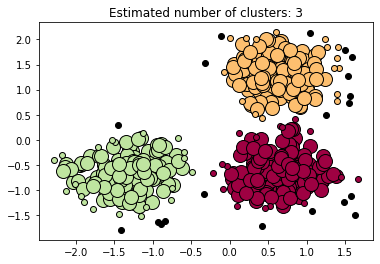

In [26]:
# Plot result
import matplotlib.pyplot as plt
%matplotlib inline

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

# apply DBSCAN to cluster non-spherical data


Number of clusters: 2
Homogeneity: 1.0
Completeness: 0.9020059344930758
V-measure: 0.889
Adjusted Rand Index: 0.927
Adjusted Mutual Information: 0.843


c:\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


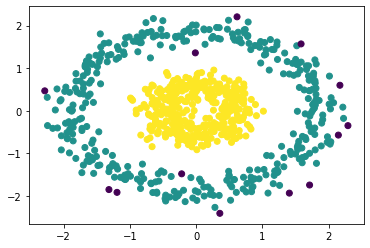

In [32]:
X, y = make_circles(n_samples=750, factor=0.3, noise=0.1)
X = StandardScaler().fit_transform(X)
y_pred = DBSCAN(eps=0.3, min_samples=10).fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=y_pred)
print('Number of clusters: {}'.format(len(set(y_pred[np.where(y_pred != -1)]))))
print('Homogeneity: {}'.format(metrics.homogeneity_score(y, y_pred)))
print('Completeness: {}'.format(metrics.completeness_score(y, y_pred)))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
# print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))


# Test out DBSCAN, on a dataset consisting of annual customer data for a wholesale distributor.


In [38]:
data = pd.read_csv(r"./Wholesale customers data.csv")
#Drop non-continuous variables
data.drop(["Channel", "Region"], axis = 1, inplace = True)

In [39]:
data = data[["Grocery", "Milk"]]
data = data.to_numpy().astype("float32", copy = False)

In [42]:
#normalize each attribute by scaling it to 0 mean and unit variance
stscaler = StandardScaler().fit(data)
data = stscaler.transform(data)
print(data)

[[-4.11148891e-02  5.23567796e-01]
 [ 1.70318365e-01  5.44457674e-01]
 [-2.81570964e-02  4.08537716e-01]
 [-3.92976910e-01 -6.24019921e-01]
 [-7.93561786e-02 -5.23964502e-02]
 [-2.97637045e-01  3.34066600e-01]
 [-1.02848761e-01 -3.52315634e-01]
 [ 1.55358955e-01 -1.13980949e-01]
 [-1.85336173e-01 -2.91409403e-01]
 [ 1.15142334e+00  7.18494892e-01]
 [ 5.29133320e-01 -5.33459894e-02]
 [-3.61161828e-01 -6.33786619e-01]
 [ 4.00924921e-01  8.84800136e-01]
 [ 7.40671933e-01  5.58511838e-02]
 [ 4.36111122e-01  4.97658879e-01]
 [-4.35116053e-01 -6.35143161e-01]
 [ 4.39271539e-01  4.09622908e-01]
 [-5.28665006e-01  4.89331037e-02]
 [ 2.26258084e-01  7.19933659e-02]
 [ 1.59362182e-01 -4.47812289e-01]
 [-3.52839351e-01 -1.73259407e-01]
 [-6.25901103e-01 -6.68105781e-01]
 [-3.66850615e-01 -5.26217222e-01]
 [ 1.48200512e+00  4.15447569e+00]
 [ 6.15307868e-01  5.39845586e-01]
 [-3.75330634e-02 -2.12461874e-01]
 [-5.36250055e-01 -6.55897379e-01]
 [-5.16866028e-01 -6.77329898e-01]
 [ 1.89686513e+00  1

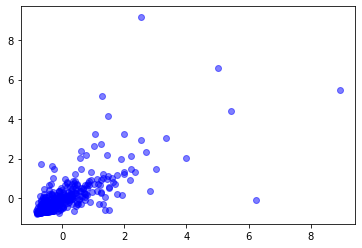

In [46]:
plt.scatter(data[:,0:1],data[:,1:], c=['blue'], alpha=0.5)

In [48]:
dbsc = DBSCAN(eps = .5, min_samples = 15).fit(data)
labels = dbsc.labels_
core_samples = np.zeros_like(labels, dtype = bool)
core_samples[dbsc.core_sample_indices_] = True

In [50]:
labels = dbsc.labels_
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [53]:
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)


Estimated number of clusters: 1
Estimated number of noise points: 36
